In [180]:
# This notebook provided a structured approach to perform Exploratory Data Analysis (EDA) on a dataset using a collection of utility functions. It's essential to adapt the examples given the nature and structure of your dataset for more accurate and insightful analyses.



import sys
if '..' not in sys.path:
    sys.path.insert(0, '..')

import requests
import pandas as pd
import govcxanalyzer.data_preprocessing as dp
import govcxanalyzer.hypothesis_testing as ht
from govcxanalyzer import eda, utils
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from IPython import display
import warnings

import warnings
warnings.filterwarnings('default')


plt.rcParams['figure.figsize'] = 4,4
plt.style.use("fivethirtyeight")

from IPython import display

tp = utils.get_date_timestamp()
# printing datetimestampe
print(tp)



2023-08-28_05:32:08


In [181]:
df = pd.read_csv("../data/fake-omb-a11-survey-response-level-data.csv", 
)

# using functions for specific touchpoints data to create 
# additonal date columns for the year and date formatted as month-year
df = dp.make_date_touchpoints_df(df)

print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   Unnamed: 0             639 non-null    int64              
 1   ID                     639 non-null    object             
 2   UUID                   639 non-null    object             
 3   Satisfaction           639 non-null    int64              
 4   Trust/Confidence       639 non-null    int64              
 5   Effectiveness/Quality  639 non-null    int64              
 6   UserGroup              639 non-null    object             
 7   Years                  639 non-null    object             
 8   Region                 639 non-null    object             
 9   Ease/Simplicity        639 non-null    int64              
 10  Efficiency/Speed       639 non-null    int64              
 11  Equity/Transparency    639 non-null    int64              

In [182]:

#Checking Unique Values

cat_columns = df.select_dtypes(include=['object']).columns.tolist() # select categorical columns
display.display(eda.count_unique_values(df, cat_columns))

# # Checking Null Values - Null and Unique Values Visualization
# This function provides a gradient visualization for the percentage of null values for the firstcolumns:

display.display(eda.NullUnique(df))




,columns,cardinality
ID,ID,639
UUID,UUID,639
UserGroup,UserGroup,5
Years,Years,5
Region,Region,3
FreeText,FreeText,99
Page,Page,4
Referrer,Referrer,74
date,date,7


,Feature,NumUnique,NumNull,%Null
13,FreeText,100,540,84.510000
15,Page,5,29,4.540000
0,Unnamed: 0,639,0,0.000000
10,Efficiency/Speed,5,0,0.000000
17,year,2,0,0.000000
16,Referrer,74,0,0.000000
14,CreatedAt,551,0,0.000000
12,Helpfulness,5,0,0.000000
11,Equity/Transparency,5,0,0.000000
9,Ease/Simplicity,5,0,0.000000


In [183]:
df.loc[13]

Unnamed: 0                                                              13
ID                                                  2023-08-27_17:35:06-14
UUID                                                        5a52a44f-bb05-
Satisfaction                                                             5
Trust/Confidence                                                         5
Effectiveness/Quality                                                    5
UserGroup                                                           Group4
Years                                                            3-4 years
Region                                                             Region2
Ease/Simplicity                                                          5
Efficiency/Speed                                                         5
Equity/Transparency                                                      5
Helpfulness                                                              3
FreeText                 

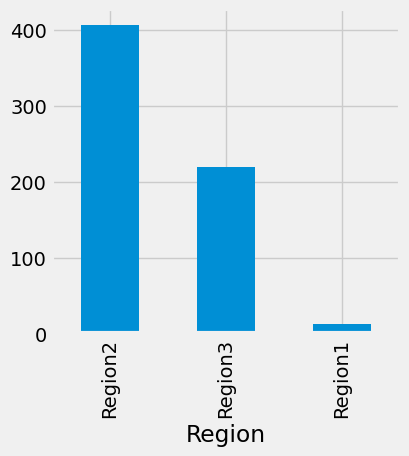

None

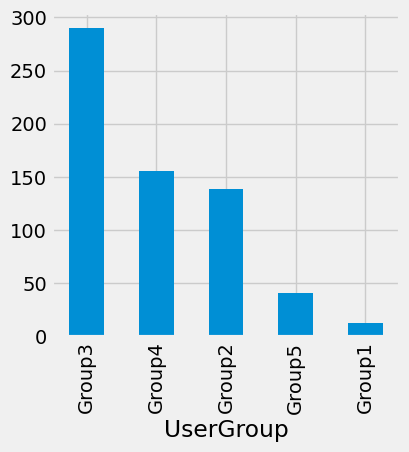

None

In [184]:

# Visualizing Categorical Distributions
# For a sample categorical column:

for catcol in [ 'Region','UserGroup']:

    display.display(eda.visualize_cat_distributions(df, catcol))


In [191]:
cxdrivers = ['Satisfaction', 'Trust/Confidence',
       'Effectiveness/Quality',
       'Ease/Simplicity', 'Efficiency/Speed', 'Equity/Transparency',
       'Helpfulness',]


from constants import drivers2questions
from govcxanalyzer import eda, utils
for col in cxdrivers:
    print(col)

    print(drivers2questions.get(col))
    
    _ = ht.get_kruskal(df, "Region", col)
    _ = eda.make_segment_likert_table(df, usergroupcol="Region", likertcol=col)
    print()

Satisfaction
I am satisfied with the service I received from [service]
Kruskal
col: Region
target col:  Satisfaction
KruskalResult(statistic=14.594222188696442, pvalue=0.0006774931646436201)
N=639
++


Satisfaction


,Region,count,mean,std,min,25%,50%,75%,max,Survey Prompt
0,Region1,12.0,3.250000,0.866025,2.0,3.0,3.0,4.0,5.0,Satisfaction
1,Region2,407.0,3.977887,0.706760,1.0,4.0,4.0,4.0,5.0,Satisfaction
2,Region3,220.0,3.877273,0.647039,2.0,4.0,4.0,4.0,5.0,Satisfaction



Trust/Confidence
This interaction increased my confidence in [service provider]
Kruskal
col: Region
target col:  Trust/Confidence
KruskalResult(statistic=26.99991610235568, pvalue=1.3710165977092455e-06)
N=639
++


Trust/Confidence


,Region,count,mean,std,min,25%,50%,75%,max,Survey Prompt
0,Region1,12.0,2.833333,0.834847,2.0,2.0,3.0,3.25,4.0,Trust/Confidence
1,Region2,407.0,4.061425,0.783865,1.0,4.0,4.0,5.00,5.0,Trust/Confidence
2,Region3,220.0,3.904545,0.749415,1.0,4.0,4.0,4.00,5.0,Trust/Confidence



Effectiveness/Quality
My need was addressed.
Kruskal
col: Region
target col:  Effectiveness/Quality
KruskalResult(statistic=16.87150131564862, pvalue=0.00021697017466193667)
N=639
++


Effectiveness/Quality


,Region,count,mean,std,min,25%,50%,75%,max,Survey Prompt
0,Region1,12.0,2.916667,1.083625,2.0,2.0,2.5,4.0,5.0,Effectiveness/Quality
1,Region2,407.0,3.864865,0.867542,1.0,3.0,4.0,4.0,5.0,Effectiveness/Quality
2,Region3,220.0,3.704545,0.727149,2.0,3.0,4.0,4.0,5.0,Effectiveness/Quality



Ease/Simplicity
It was easy to complete what I needed to do.
Kruskal
col: Region
target col:  Ease/Simplicity
KruskalResult(statistic=21.93769506161275, pvalue=1.723018912816717e-05)
N=639
++


Ease/Simplicity


,Region,count,mean,std,min,25%,50%,75%,max,Survey Prompt
0,Region1,12.0,1.333333,0.651339,1.0,1.0,1.0,1.25,3.0,Ease/Simplicity
1,Region2,407.0,2.663391,1.067759,1.0,2.0,2.0,3.00,5.0,Ease/Simplicity
2,Region3,220.0,2.472727,0.846255,1.0,2.0,2.0,3.00,5.0,Ease/Simplicity



Efficiency/Speed
It took a reasonable amount of time to do what I needed to do.
Kruskal
col: Region
target col:  Efficiency/Speed
KruskalResult(statistic=27.961714374693333, pvalue=8.475998501490803e-07)
N=639
++


Efficiency/Speed


,Region,count,mean,std,min,25%,50%,75%,max,Survey Prompt
0,Region1,12.0,1.583333,0.996205,1.0,1.0,1.0,2.0,4.0,Efficiency/Speed
1,Region2,407.0,2.953317,1.140513,1.0,2.0,3.0,4.0,5.0,Efficiency/Speed
2,Region3,220.0,2.600000,0.938278,1.0,2.0,2.0,3.0,5.0,Efficiency/Speed



Equity/Transparency
I understood what was being asked of me throughout the process.
Kruskal
col: Region
target col:  Equity/Transparency
KruskalResult(statistic=27.30632416821281, pvalue=1.176270069278624e-06)
N=639
++


Equity/Transparency


,Region,count,mean,std,min,25%,50%,75%,max,Survey Prompt
0,Region1,12.0,1.333333,0.492366,1.0,1.0,1.0,2.0,2.0,Equity/Transparency
1,Region2,407.0,2.690418,0.996289,1.0,2.0,3.0,3.0,5.0,Equity/Transparency
2,Region3,220.0,2.468182,0.829747,1.0,2.0,2.0,3.0,5.0,Equity/Transparency



Helpfulness
The [service] helped me do what I needed to do.
Kruskal
col: Region
target col:  Helpfulness
KruskalResult(statistic=3.4518391782878712, pvalue=0.17800928108116232)
N=639


Helpfulness


,Region,count,mean,std,min,25%,50%,75%,max,Survey Prompt
0,Region1,12.0,2.250000,1.138180,1.0,1.0,2.0,3.0,4.0,Helpfulness
1,Region2,407.0,2.808354,1.001294,1.0,2.0,3.0,4.0,5.0,Helpfulness
2,Region3,220.0,2.727273,0.895540,1.0,2.0,3.0,3.0,5.0,Helpfulness


In [186]:
df["Region"].value_counts()

Region
Region2    407
Region3    220
Region1     12
Name: count, dtype: int64

In [172]:
df.loc[13]

Unnamed: 0                                                              13
ID                                                  2023-08-27_17:35:06-14
UUID                                                        5a52a44f-bb05-
Satisfaction                                                             5
Trust/Confidence                                                         5
Effectiveness/Quality                                                    5
UserGroup                                                           Group4
Years                                                            3-4 years
Region                                                             Region2
Ease/Simplicity                                                          5
Efficiency/Speed                                                         5
Equity/Transparency                                                      5
Helpfulness                                                              3
FreeText                 